In [78]:
from keras import Input, Model, regularizers
from keras.datasets import mnist
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

In [79]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_shape = 28**2
initializer = tf.keras.initializers.GlorotUniform()

# This is our input image
input_img = Input(shape=(input_shape,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='linear',activity_regularizer=regularizers.l1(10e-5),
                kernel_initializer=initializer)(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_shape, activation='sigmoid', kernel_initializer=initializer)(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [80]:
# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [81]:
# This is our encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [88]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [89]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 256.
x_test = x_test.astype('float32') / 256.
x_train = x_train.reshape(x_train.shape[0], 28**2)
x_test = x_test.reshape(x_test.shape[0], 28**2)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [90]:
autoencoder.summary()

Model: "functional_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_19 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [91]:
#Train autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0966 - val_loss: 0.0949
Epoch 2/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0961 - val_loss: 0.0948
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0959 - val_loss: 0.0947
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0959 - val_loss: 0.0948
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0958 - val_loss: 0.0947
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0958 - val_loss: 0.0945
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0957 - val_loss: 0.0945
Epoch 8/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0957 - val_loss: 0.0945
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0957 - val_loss: 0.0945
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0956 - val_loss: 0.0945

In [92]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

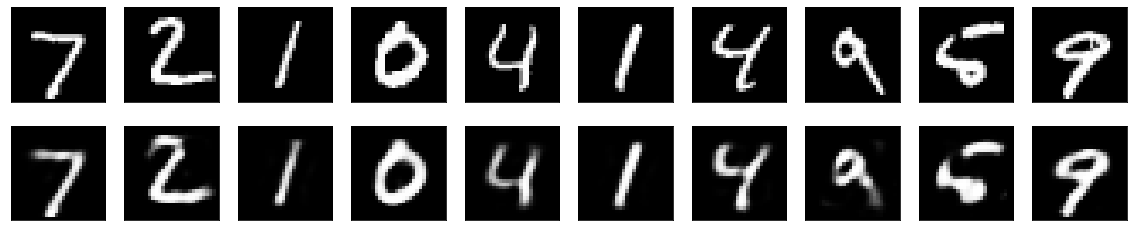

In [93]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)